In [1]:
# Import statements
import tensorflow as tf
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
import h5py

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Plot formatting defaults
plt.rc('ytick', direction='out')
plt.rc('grid', color='w', linestyle='solid')
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', direction='out')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [4]:
# Load in train and test data

mat = scipy.io.loadmat('W8_samples.mat')
W8_cell_data = mat['cell_data']

mat = scipy.io.loadmat('W9_samples.mat')
W9_cell_data = mat['cell_data']

del mat

X_train, y_train = shuffle(W8_cell_data[:,1:], W8_cell_data[:,0]*100)
X_test = W9_cell_data[:,1:]
y_test = W9_cell_data[:,0]*100

# Reshape for LSTM: shape = (# samples, # timesteps, # features)
X_train = np.transpose(np.reshape(X_train, (X_train.shape[0], 2, int(X_train.shape[1]/2))), (0, 2, 1))
X_test = np.transpose(np.reshape(X_test, (X_test.shape[0], 2, int(X_test.shape[1]/2))), (0, 2, 1))

# Downsample test by 1/10th
y_test = y_test[0::10]
X_test = X_test[0::10, :, :]

# Save dimensions for LSTM

n_samp, n_time, n_feat = X_train.shape

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80902, 1200, 2)
(80902,)
(7109, 1200, 2)
(7109,)


In [ ]:
# Plot single training example
plt.plot(X_train[200,:,0])
plt.plot(X_train[200,:,1])
# plt.plot(test[200,0,:])
# plt.plot(test[200,1,:])
print(X_train.shape)
plt.show()

In [6]:
def build_cnn_model():
    model = keras.Sequential()
    model.add(layers.SeparableConv1D(100, 10, data_format='channels_last', padding='same'))
    model.add(layers.MaxPool1D(pool_size=(2)))
    model.add(layers.Conv1D(20, 5, padding='same'))
    model.add(layers.MaxPool1D(pool_size=(2)))
    # model.add(layers.Conv1D(10, 3, padding='same'))
    # model.add(layers.MaxPool1D(pool_size=(2)))
    # model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(200, activation="relu"))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(1, activation="linear"))
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [8]:
cnn_model = build_cnn_model()
# # Check shape of model (need to instantiate input shape)
# cnn_model.build(input_shape=(500,1200,2))
# cnn_model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-22 21:26:45.292322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-22 21:26:45.293939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
history = cnn_model.fit(X_train,
                    y_train,
                    epochs=200,
                    verbose=2,
                    batch_size=480,
                    validation_split=0.2)

# history = cnn_model.fit(X_train,
#                     y_train,
#                     epochs=100,
#                     verbose=2,
#                     batch_size=500,
#                     validation_split=0.2)

cnn_model.save("/models/cnnmodel_w8_200")

Epoch 1/200


2022-05-22 21:28:52.354558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-22 21:28:53.297003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-22 21:29:15.439991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 - 25s - loss: 13.3559 - mean_absolute_error: 13.3559 - val_loss: 2.4398 - val_mean_absolute_error: 2.4398 - 25s/epoch - 184ms/step
Epoch 2/200
135/135 - 19s - loss: 2.4963 - mean_absolute_error: 2.4963 - val_loss: 2.4862 - val_mean_absolute_error: 2.4862 - 19s/epoch - 143ms/step
Epoch 3/200
135/135 - 20s - loss: 2.8739 - mean_absolute_error: 2.8739 - val_loss: 2.5759 - val_mean_absolute_error: 2.5759 - 20s/epoch - 145ms/step
Epoch 4/200
135/135 - 20s - loss: 2.4559 - mean_absolute_error: 2.4559 - val_loss: 2.4158 - val_mean_absolute_error: 2.4158 - 20s/epoch - 145ms/step
Epoch 5/200
135/135 - 19s - loss: 2.4670 - mean_absolute_error: 2.4670 - val_loss: 2.4494 - val_mean_absolute_error: 2.4494 - 19s/epoch - 144ms/step
Epoch 6/200
135/135 - 20s - loss: 2.5272 - mean_absolute_error: 2.5272 - val_loss: 2.5702 - val_mean_absolute_error: 2.5702 - 20s/epoch - 146ms/step
Epoch 7/200
135/135 - 20s - loss: 2.4283 - mean_absolute_error: 2.4283 - val_loss: 2.4167 - val_mean_absolute_error:

NameError: name 'pwd' is not defined

In [13]:
cnn_model.save("cnnmodel_w8_200")

INFO:tensorflow:Assets written to: cnnmodel_w8_200/assets


INFO:tensorflow:Assets written to: cnnmodel_w8_200/assets


2022-05-22 22:36:53.834147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


223/223 [==============================] - 2s 6ms/step


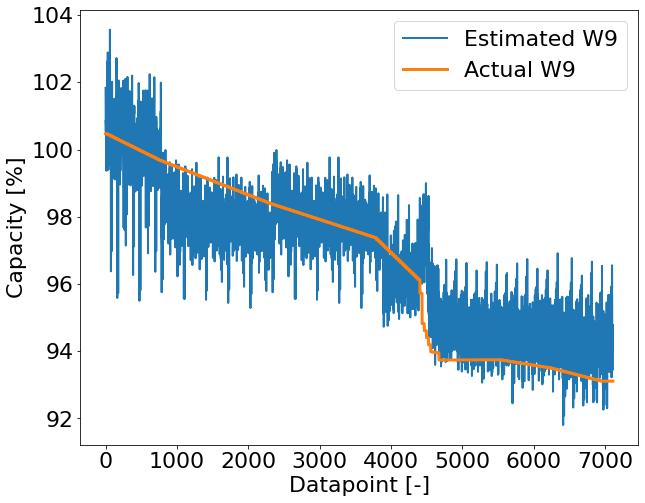

223/223 - 1s - loss: 0.8579 - mean_absolute_error: 0.8579 - 1s/epoch - 6ms/step


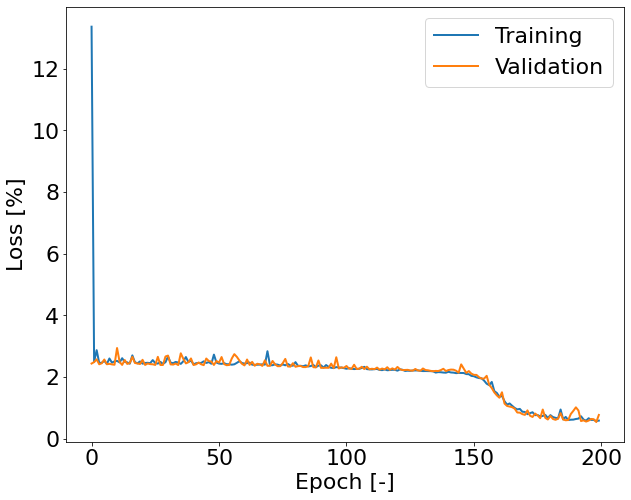

In [14]:
y_hat = cnn_model.predict(X_test)
y_hat_plot = np.ravel(y_hat)
plt.plot(y_hat_plot)
plt.plot(y_test, linewidth=3)
plt.legend(['Estimated W9', 'Actual W9'])
plt.xlabel("Datapoint [-]")
plt.ylabel("Capacity [%]")
plt.show()
cnn_model.evaluate(X_test, y_test, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel("Epoch [-]")
plt.ylabel("Loss [%]")
plt.show()

In [ ]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

np.save('my_history.npy',history.history)